In [1]:
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.interpolate import griddata
import astropy
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
from astropy.coordinates import SkyCoord
from astropy.coordinates import SkyOffsetFrame
import astropy.units as u
cosmo = FlatLambdaCDM(H0=75. * u.km / u.s / u.Mpc, Om0=0.31)
c = 299792.458
from ellipsoid import*

In [2]:
hdu = fits.open('CF4gp_new_64-z008_velocity.fits')
hdu_d = fits.open('CF4gp_new_64-z008_delta.fits')

In [3]:
np.shape(hdu)
len(hdu)

1

In [4]:
hdu[0]

In [5]:
t = 52.*hdu[0].data

In [6]:
#t

In [7]:
t_d = hdu_d[0].data
#t_d

In [8]:
np.shape(t)

(3, 64, 64, 64)

In [9]:
np.mean(t[:,:,:,:])

8.6287645e-07

In [10]:
np.shape(t_d)

(64, 64, 64)

In [11]:
t[:,63,10,10]

array([121.200165, 200.14859 ,  42.35306 ], dtype=float32)

In [12]:
t_d[63,10,10]

0.03911024

In [13]:
print (np.max(t))

2050.8162


In [14]:
Lania = pd.read_csv("Laniakia_positions.csv")
Lania

,sgx,sgy,sgz
0,-1882.60,501.715,-6086.52
1,-1757.11,501.715,-6086.52
2,-1631.62,501.715,-6086.52
3,-1506.13,501.715,-6086.52
4,-1380.64,501.715,-6086.52
...,...,...,...
75001,-2259.07,-2635.540,14117.40
75002,-2133.58,-2635.540,14117.40
75003,-2008.09,-2635.540,14117.40
75004,-1882.60,-2635.540,14117.40


In [15]:
u = cosmo.comoving_distance(Lania.sgx/c)
v = cosmo.comoving_distance(Lania.sgy/c)
w = cosmo.comoving_distance(Lania.sgz/c)

In [16]:
u

0       -25.137935
1       -23.460021
2       -21.782431
3       -20.105166
4       -18.428226
           ...    
75001   -30.173624
75002   -28.494737
75003   -26.816174
75004   -25.137935
75005   -23.460021
Name: sgx, Length: 75006, dtype: float64

In [17]:
ii = np.rint(np.round(32. + ((64./1000.)*u),0)).astype(int)
jj = np.rint(np.round(32. + ((64./1000.)*v),0)).astype(int)
kk = np.rint(np.round(32. + ((64./1000.)*w),0)).astype(int)

In [18]:
lania_vv = t[:,kk,jj,ii]

In [19]:
print (np.mean(lania_vv[0]))

-177.46527


In [20]:
u_d=[];v_d=[];w_d=[]
ii_d=[];jj_d=[];kk_d=[]
for k in range(64):
    for j in range(64):
        for i in range(64):
            #print (i, j, k, -500.+(i*15.625), -500.+(j*15.625), -500.+(k*15.625))
            if -16. <= -500.+(k*15.625) <= 16.: 
                u_d.append(-500.+(i*15.625));v_d.append(-500.+(j*15.625));w_d.append(-500.+(k*15.625))
                ii_d.append(i);jj_d.append(j);kk_d.append(k)

# ii_d = np.rint(np.round(32. + ((64./1000.)*u_d),0)).astype(int)
# jj_d = np.rint(np.round(32. + ((64./1000.)*v_d),0)).astype(int)
# kk_d = np.rint(np.round(32. + ((64./1000.)*w_d),0)).astype(int)
#kk_d = [-62.5,-46.875,-31.25,-15.625,0.0,15.625,31.25,46.875,62.5]
lania_d = t_d[kk_d,jj_d,ii_d]
lania_v = t[:,kk_d,jj_d,ii_d]
#print (np.median(lania_v[2]),np.median(lania_v[1]),np.median(lania_v[0]))
# #ii_d
# np.shape(ii_d)
#print (x,y,z)

In [21]:
xi = np.linspace(-500.,500.,100)
yi = np.linspace(-500.,500.,100)
# grid the data.
zi = griddata((u_d,v_d), lania_d, (xi[None,:], yi[:,None,]), method='linear')
np.shape(zi)

(100, 100)

<IPython.core.display.Javascript object>


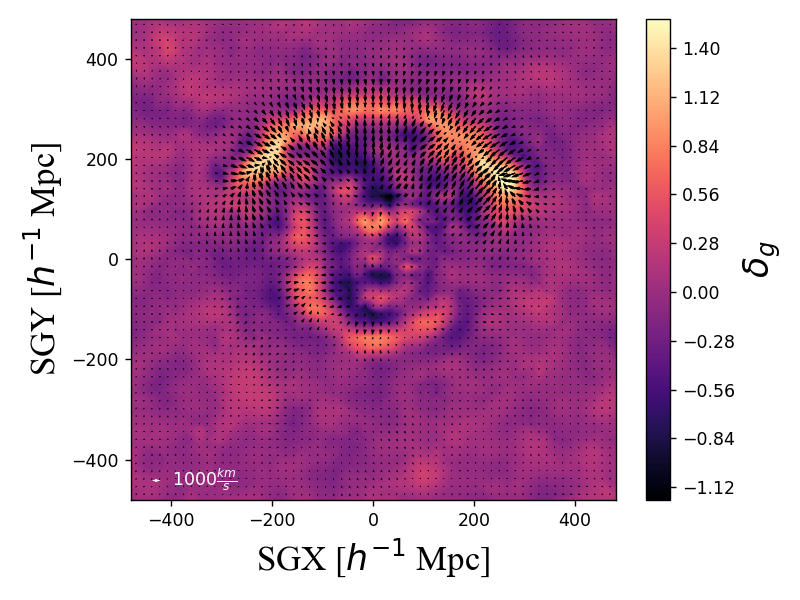

In [22]:
# d02 = plt.scatter(xi,yi,c=zi,edgecolor='none',cmap=plt.cm.copper,s=20)
# cbar2 = plt.colorbar(d02)
# cbar2.set_label(r'$\delta_g$', fontname = 'Times New Roman',size=20)
plt.xlim(-480,480)
plt.ylim(-480,480)
d00 = plt.contourf(xi,yi,zi,400,cmap=plt.cm.magma)#RdYlBu_r,vmax=600.,vmin=-600.
cbar00 = plt.colorbar(d00)
cbar00.set_label(r'$\delta_g$', fontname = 'Times New Roman',size=20)
Q = plt.quiver(u_d, v_d, lania_v[2], lania_v[1],color='black')
qk = plt.quiverkey(Q, 0.2, 0.2, 1000, r'$1000 \frac{km}{s}$', labelpos='E',
                   coordinates='figure',color='white',labelcolor='white')
plt.xlabel(r'SGX [$h^{-1}$ Mpc]', fontname = 'Times New Roman',size=20)
plt.ylabel(r'SGY [$h^{-1}$ Mpc]', fontname = 'Times New Roman',size=20)
plt.tight_layout()
plt.savefig('cf4.png', dpi=300)
plt.show()

In [23]:
np.shape(lania_v)

(3, 12288)

In [24]:
lania_cf4 = pd.DataFrame(np.column_stack((u,v,w,lania_vv[2],lania_vv[1],lania_vv[0])),columns=["SGX","SGY","SGZ","vx","vy","vz"])
lania_cf4

,SGX,SGY,SGZ,vx,vy,vz
0,-25.137935,6.68693,-81.535061,-62.645493,173.392334,-393.415131
1,-23.460021,6.68693,-81.535061,-62.645493,173.392334,-393.415131
2,-21.782431,6.68693,-81.535061,84.382385,177.234711,-243.780273
3,-20.105166,6.68693,-81.535061,84.382385,177.234711,-243.780273
4,-18.428226,6.68693,-81.535061,84.382385,177.234711,-243.780273
...,...,...,...,...,...,...
75001,-30.173624,-35.21223,186.152748,-261.089935,-3.945054,165.646042
75002,-28.494737,-35.21223,186.152748,-261.089935,-3.945054,165.646042
75003,-26.816174,-35.21223,186.152748,-261.089935,-3.945054,165.646042
75004,-25.137935,-35.21223,186.152748,-261.089935,-3.945054,165.646042


In [25]:
lania_cf4.to_csv("lania_cf4.csv", index = False, header = True)

In [26]:
eansa = ls_ellipsoid(lania_cf4.SGX,lania_cf4.SGY,lania_cf4.SGZ)

/Users/uqksaida/Desktop/UQ_work/Leo_Laniakia/ellipsoid.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = xx[:,np.newaxis]
/Users/uqksaida/Desktop/UQ_work/Leo_Laniakia/ellipsoid.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = yy[:,np.newaxis]
/Users/uqksaida/Desktop/UQ_work/Leo_Laniakia/ellipsoid.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  z = zz[:,np.newaxis]


In [27]:
print("coefficients:"  , eansa)
center,axes,inve = polyToParams3D(eansa,False)   #get ellipsoid 3D parameters
print("center:"        , center)
print("axes:"          , axes)
print("rotationMatrix:", inve)

coefficients: [ 1.22582498e-04  2.04639012e-04  8.39763798e-05 -2.28220953e-05
  2.45955845e-05  7.63565464e-05  9.34255693e-03  4.45116878e-03
 -5.23740791e-03 -1.00000000e+00]
normed 
 [[ 1.         -0.09308872  0.10032258]
 [-0.09308872  1.66939829  0.31144963]
 [ 0.10032258  0.31144963  0.68506011]]
center: [-44.99315099 -22.32517202  47.9224861 ]
axes: [141.99314692 104.78737063  80.02618771]
rotationMatrix: [[-0.26981142 -0.28130676  0.92090624]
 [-0.95945855 -0.0023993  -0.28183957]
 [-0.08149291  0.9596149   0.26925482]]


In [53]:
vec01 = polyToParams3D(eansa,"true")


polynomial
 [ 1.22582498e-04  2.04639012e-04  8.39763798e-05 -2.28220953e-05
  2.45955845e-05  7.63565464e-05  9.34255693e-03  4.45116878e-03
 -5.23740791e-03 -1.00000000e+00]

Algebraic form of polynomial
 [[ 1.22582498e-04 -1.14110476e-05  1.22977922e-05  4.67127846e-03]
 [-1.14110476e-05  2.04639012e-04  3.81782732e-05  2.22558439e-03]
 [ 1.22977922e-05  3.81782732e-05  8.39763798e-05 -2.61870395e-03]
 [ 4.67127846e-03  2.22558439e-03 -2.61870395e-03 -1.00000000e+00]]

Center at: [-44.99315099 -22.32517202  47.9224861 ]

Algebraic form translated to center
 [[ 1.22582498e-04 -1.14110476e-05  1.22977922e-05  8.67361738e-19]
 [-1.14110476e-05  2.04639012e-04  3.81782732e-05 -4.33680869e-19]
 [ 1.22977922e-05  3.81782732e-05  8.39763798e-05  0.00000000e+00]
 [ 8.67361738e-19 -4.33680869e-19  0.00000000e+00 -1.38535690e+00]] 

normed 
 [[ 1.         -0.09308872  0.10032258]
 [-0.09308872  1.66939829  0.31144963]
 [ 0.10032258  0.31144963  0.68506011]]

Axes are
 [141.99314692 104.78737

In [65]:
# center = [-44.99315099, -22.32517202,  47.9224861]
# axes = [141.99314692, 104.78737063,  80.02618771]
# R = [[-0.26981142, -0.28130676,  0.92090624]
#  [-0.95945855, -0.0023993,  -0.28183957]
#  [-0.08149291,  0.9596149,   0.26925482]]
xin = lania_cf4.SGX
yin = lania_cf4.SGY
zin = lania_cf4.SGZ

The function performs the following steps to check the solution:

* Subtract the center of the ellipsoid from each point to make the ellipsoid centered at the origin.
* Create a transformation matrix that will rotate the points so that the bulges of the ellipsoid are aligned with the axes (no xy, xz, or yz terms), and then scale the points by the inverse of the axes gains.
* Apply the transformation matrix to the points.
* Calculate the distance from the origin for each point (which should ideally be 1.0).
The function then outputs the average radius and standard deviation of the radii of the transformed points, which can be used to evaluate the accuracy of the fitted ellipsoid.

In general, a good fit of an ellipsoid to a set of points should result in radii that are close to 1 and a low standard deviation. However, the specific values that can be considered as indicating a good fit depend on the context and the tolerance for errors.

For example, in some applications, a radius within 10% of 1 (i.e., between 0.9 and 1.1) may be considered a good fit. In other applications, a more stringent criterion may be required, such as a radius within 5% of 1 (i.e., between 0.95 and 1.05).

Similarly, the acceptable range of standard deviation may also depend on the context and the required accuracy of the fit. In general, a lower standard deviation indicates a more precise fit. However, what is an acceptable standard deviation can depend on the specifics of the application.

Therefore, the values that indicate a good fit should be determined based on the context and the specific requirements of the application.

In [68]:
check01 = printAns3D(center,axes,inve,xin,yin,zin,"True")


Center at    -44.9932,  -22.3252,   47.9225
Axes gains   141.9931,  104.7874,   80.0262 
Rotation Matrix
  -0.26981,  -0.28131,   0.92091
  -0.95946,  -0.00240,  -0.28184
  -0.08149,   0.95961,   0.26925

Transformation Matrix
 [[ 0.00938071 -0.0004207   0.00055652]
 [-0.0004207   0.01206435  0.00141072]
 [ 0.00055652  0.00141072  0.00763658]]

Average Radius      0.9597 (truth is 1.0)
Stdev of Radius     0.1126
 


<IPython.core.display.Javascript object>


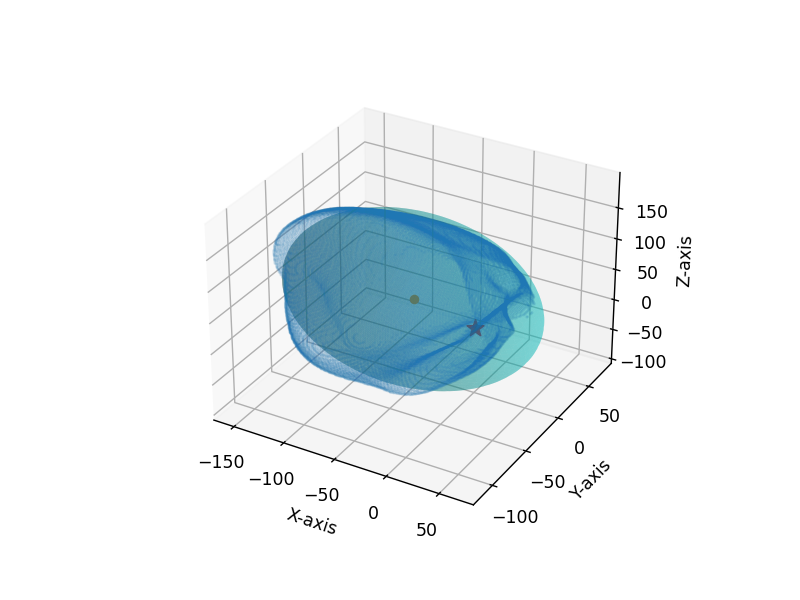

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch

# Center of the ellipsoid
center = center

# Axes of the ellipsoid (semi-major axis length)
axes = axes

# Rotation matrix
R = inve

# Generate points on the ellipsoid
uu = np.linspace(0, 2 * np.pi, 100)
vv = np.linspace(0, np.pi, 100)
x = axes[0] * np.outer(np.cos(uu), np.sin(vv))
y = axes[1] * np.outer(np.sin(uu), np.sin(vv))
z = axes[2] * np.outer(np.ones_like(uu), np.cos(vv))

# Transform the points using the rotation matrix
for i in range(len(x)):
    for j in range(len(x)):
        [x[i,j], y[i,j], z[i,j]] = np.dot([x[i,j], y[i,j], z[i,j]], R) + center

# Plot the ellipsoid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lania_cf4.SGX,lania_cf4.SGY,lania_cf4.SGZ,s=0.1,alpha=0.1)
ax.plot_surface(x, y, z, color='c', alpha=0.3)
ax.scatter(-44.99315099, -22.32517202,  47.9224861)
ax.scatter(0,0,0,color="red",marker='*',s=100)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.show()

In [29]:
print (center[0],center[1],center[2])

-44.993150994073986 -22.325172020222773 47.92248609780569


In [30]:
lania_in = pd.read_csv("laniakia_density.csv")
lania_in

,sgx,sgy,sgz,delta
0,-18.75,5.00,-60.0,-0.347969
1,-17.50,5.00,-60.0,-0.334302
2,-16.25,5.00,-60.0,-0.208867
3,-15.00,5.00,-60.0,-0.191881
4,-13.75,5.00,-60.0,-0.126498
...,...,...,...,...
1197005,-26.25,-51.25,150.0,0.599204
1197006,-25.00,-51.25,150.0,1.085904
1197007,-23.75,-51.25,150.0,0.721287
1197008,-22.50,-51.25,150.0,0.721287


In [31]:
ii_in = np.rint(np.round(32. + ((64./1000.)*lania_in["sgx"]),0)).astype(int)
jj_in = np.rint(np.round(32. + ((64./1000.)*lania_in["sgy"]),0)).astype(int)
kk_in = np.rint(np.round(32. + ((64./1000.)*lania_in["sgz"]),0)).astype(int)
lania_v_in = t[:,kk_in,jj_in,ii_in]

In [32]:
lania_v_in
np.shape(lania_v_in)

(3, 1197010)

In [33]:
sgx_bf = np.mean(lania_v_in[2]);sgy_bf = np.mean(lania_v_in[1]);sgz_bf = np.mean(lania_v_in[0])
print (sgx_bf,sgy_bf,sgz_bf,len(lania_v_in[2]))

-148.54167 47.83041 -195.61952 1197010


In [34]:
lania_cf4_wo_bf = pd.DataFrame(np.column_stack((u,v,w,lania_vv[2]-sgx_bf,lania_vv[1]-sgy_bf,lania_vv[0]-sgz_bf)),columns=["SGX","SGY","SGZ","vx","vy","vz"])
lania_cf4_wo_bf

,SGX,SGY,SGZ,vx,vy,vz
0,-25.137935,6.68693,-81.535061,85.896179,125.561920,-197.795609
1,-23.460021,6.68693,-81.535061,85.896179,125.561920,-197.795609
2,-21.782431,6.68693,-81.535061,232.924057,129.404297,-48.160751
3,-20.105166,6.68693,-81.535061,232.924057,129.404297,-48.160751
4,-18.428226,6.68693,-81.535061,232.924057,129.404297,-48.160751
...,...,...,...,...,...,...
75001,-30.173624,-35.21223,186.152748,-112.548264,-51.775463,361.265564
75002,-28.494737,-35.21223,186.152748,-112.548264,-51.775463,361.265564
75003,-26.816174,-35.21223,186.152748,-112.548264,-51.775463,361.265564
75004,-25.137935,-35.21223,186.152748,-112.548264,-51.775463,361.265564


In [35]:
print (np.mean(lania_cf4_wo_bf["vy"]))

19.254334947546237


In [36]:
sgx_c = center[0]
sgy_c = center[1]
sgz_c = center[2]
ii_c = np.rint(np.round(32. + ((64./1000.)*sgx_c),0)).astype(int)
jj_c = np.rint(np.round(32. + ((64./1000.)*sgy_c),0)).astype(int)
kk_c = np.rint(np.round(32. + ((64./1000.)*sgz_c),0)).astype(int)
lania_v_c = t[:,ii_c,jj_c,kk_c]
print (sgx_c,sgy_c,sgz_c)
print (lania_v_c)
print ((lania_v_c[0]-sgx_bf),(lania_v_c[1]-sgy_bf),(lania_v_c[2]-sgz_bf))
print (np.mean(lania_vv[0]),np.mean(lania_vv[1]),np.mean(lania_vv[2]))

-44.993150994073986 -22.325172020222773 47.92248609780569
[-233.27724   407.61722   -57.192703]
-84.735565 359.7868 138.42682
-177.46527 67.08475 -217.64844


In [37]:
lania_cf4_wo_bf_c = pd.DataFrame(np.column_stack((u-sgx_c,v-sgy_c,w-sgz_c,lania_vv[2]-sgx_bf,lania_vv[1]-sgy_bf,lania_vv[0]-sgz_bf)),columns=["SGX","SGY","SGZ","vx","vy","vz"])
lania_cf4_wo_bf_c

,SGX,SGY,SGZ,vx,vy,vz
0,19.855216,29.012102,-129.457547,85.896179,125.561920,-197.795609
1,21.533130,29.012102,-129.457547,85.896179,125.561920,-197.795609
2,23.210720,29.012102,-129.457547,232.924057,129.404297,-48.160751
3,24.887985,29.012102,-129.457547,232.924057,129.404297,-48.160751
4,26.564925,29.012102,-129.457547,232.924057,129.404297,-48.160751
...,...,...,...,...,...,...
75001,14.819527,-12.887058,138.230261,-112.548264,-51.775463,361.265564
75002,16.498414,-12.887058,138.230261,-112.548264,-51.775463,361.265564
75003,18.176977,-12.887058,138.230261,-112.548264,-51.775463,361.265564
75004,19.855216,-12.887058,138.230261,-112.548264,-51.775463,361.265564


In [38]:
vr = (lania_cf4_wo_bf_c.SGX*lania_cf4_wo_bf_c.vx+lania_cf4_wo_bf_c.SGY*lania_cf4_wo_bf_c.vy+lania_cf4_wo_bf_c.SGZ*lania_cf4_wo_bf_c.vz)/np.sqrt(lania_cf4_wo_bf_c.SGX**2+lania_cf4_wo_bf_c.SGY**2+lania_cf4_wo_bf_c.SGZ**2)


In [39]:
lania_cf4_wo_bf_c_vr = pd.DataFrame(np.column_stack((lania_cf4_wo_bf_c,vr)),columns=["SGX","SGY","SGZ","vx","vy","vz","vr"])

In [40]:
lania_cf4_wo_bf_c_vr

,SGX,SGY,SGZ,vx,vy,vz,vr
0,19.855216,29.012102,-129.457547,85.896179,125.561920,-197.795609,230.751594
1,21.533130,29.012102,-129.457547,85.896179,125.561920,-197.795609,231.379957
2,23.210720,29.012102,-129.457547,232.924057,129.404297,-48.160751,114.307816
3,24.887985,29.012102,-129.457547,232.924057,129.404297,-48.160751,116.948735
4,26.564925,29.012102,-129.457547,232.924057,129.404297,-48.160751,119.559678
...,...,...,...,...,...,...,...
75001,14.819527,-12.887058,138.230261,-112.548264,-51.775463,361.265564,350.506466
75002,16.498414,-12.887058,138.230261,-112.548264,-51.775463,361.265564,348.683157
75003,18.176977,-12.887058,138.230261,-112.548264,-51.775463,361.265564,346.815867
75004,19.855216,-12.887058,138.230261,-112.548264,-51.775463,361.265564,344.905827


In [41]:
lania_cf4_wo_bf_c_vr.to_csv("lania_cf4_wo_bf_c_vr.csv", index = False, header = True)

In [42]:
lania_cf4_z0 = lania_cf4.drop(lania_cf4[abs(lania_cf4.SGZ) > 20.].index)

In [43]:
lania_cf4_z0

,SGX,SGY,SGZ,vx,vy,vz
14938,-87.448232,-90.828914,-19.266588,-446.319244,11.610750,-176.131622
14939,-85.758372,-90.828914,-19.266588,-562.954529,-157.107498,-176.786118
14940,-84.068699,-90.828914,-19.266588,-562.954529,-157.107498,-176.786118
14941,-82.379482,-90.828914,-19.266588,-562.954529,-157.107498,-176.786118
14942,-80.690586,-90.828914,-19.266588,-562.954529,-157.107498,-176.786118
...,...,...,...,...,...,...
26018,-46.980311,61.681614,19.216984,34.582291,195.262009,-304.946289
26019,-50.345531,63.342545,19.216984,34.582291,195.262009,-304.946289
26020,-62.133974,68.323366,19.216984,48.016491,154.340576,-293.316895
26021,-80.690586,69.982982,19.216984,-77.384888,100.172829,-315.919434
